In [238]:
import matplotlib.pyplot as plt
import json
import seaborn as sns
import numpy as np
import math

models = [
    ["openai", "gpt-3.5-turbo-0125"],
    ["openai", "gpt-4-0613"],
    ["openai", "gpt-4-0125-preview"],
    ["openai", "gpt-4-turbo-2024-04-09"],
    ["anthropic", "claude-3-opus-20240229"],
    ["anthropic", "claude-3-sonnet-20240229"],
    ["anthropic", "claude-3-haiku-20240307"],
]

model_names_nice = [
    "GPT 3.5 Turbo",
    "GPT 4",
    "GPT 4 Turbo Jan 2024",
    "GPT 4 Turbo Apr 2024 ",
    "Claude 3 Opus",
    "Claude 3 Sonnet",
    "Claude 3 Haiku",
]

## Plotting

In [197]:
data = {}

for m in models:
    provider, model = m
    totals = []
    values = []
    for i in range(10):
        try:
            file_path = (
                "eval_results/" + "-".join([provider, str(i), model, "gpqa"]) + ".json"
            )
            with open(file_path, "r") as json_file:
                # Dump the dictionary to the file
                loaded_data = json.load(json_file)
            values.append(loaded_data["grading"])
            totals.append(sum(loaded_data["grading"]) / len(loaded_data["grading"]))
        except:
            continue
    data[model] = {"totals": totals, "values": values}

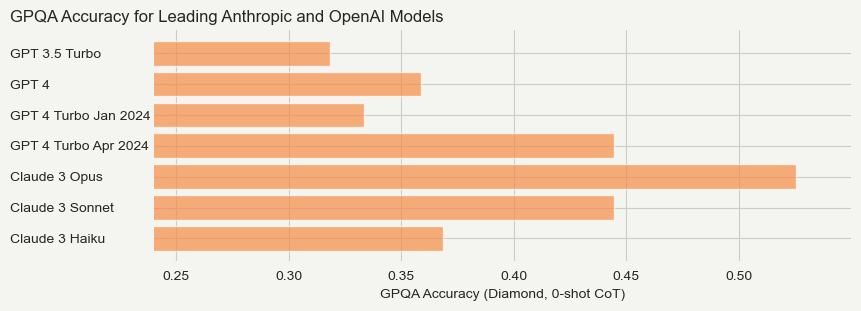

In [263]:
sns.set_style("whitegrid")
# Calculate percentiles
percentiles = {}
for key in data:
    percentiles[key] = {
        "Median": np.random.choice(data[key]["totals"]),
    }

# Plotting
fig, ax = plt.subplots(figsize=(9, 3))
bar_height = 0.8
opacity = 0.7
color = "#f68d45"


for i, key in enumerate(reversed(data.keys())):
    left = 0
    for j, percentile in enumerate(["Median"]):
        width = percentiles[key][percentile] - left
        ax.barh(
            i,
            width,
            bar_height,
            left=left,
            color=color,
            alpha=opacity,
        )
        left += width


fig.patch.set_facecolor("#f4f4f0")
ax.set_facecolor("#f4f4f0")

ax.set_yticks(range(len(data.keys())))
ax.set_yticklabels(reversed(model_names_nice))
ax.set_xticks([0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
sns.despine(bottom=True, left=True, right=True)
ax.set_xlabel("GPQA Accuracy (Diamond, 0-shot CoT)")
ax.set_xlim(0.24, 0.55)
ax.tick_params(axis="y", which="major", pad=100)
for tick in ax.yaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")

bbox = ax.get_yticklabels()[-1].get_window_extent()
x, _ = ax.transAxes.inverted().transform([bbox.x0, bbox.y0])
ax.set_title(
    "GPQA Accuracy for Leading Anthropic and OpenAI Models",
    ha="left",
    x=x,
)


plt.savefig("one_sample.png", dpi=300, bbox_inches="tight")
plt.show()

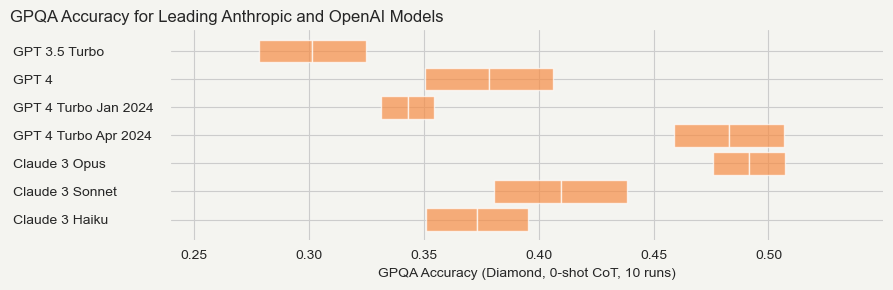

In [264]:
from scipy.stats import t

# Calculate mean, standard deviation, and confidence interval
stats = {}
for key in data:
    stats[key] = {
        "mean": np.mean(data[key]["totals"]),
        "std": np.std(data[key]["totals"]),
        "ci": t.interval(
            0.95,
            len(data[key]["totals"]) - 1,
            loc=np.mean(data[key]["totals"]),
            scale=st.sem(data[key]["totals"]),
        ),
    }

# Plotting
fig, ax = plt.subplots(figsize=(9, 3))
bar_height = 0.8
opacity = [0.7, 0.4]
color = "#f68d45"

for i, key in enumerate(reversed(data.keys())):
    mean = stats[key]["mean"]
    ci_low, ci_high = stats[key]["ci"]
    left = ci_low
    width = mean - ci_low
    ax.barh(
        i,
        width,
        bar_height,
        left=left,
        color=color,
        alpha=opacity[0],
    )
    ax.barh(
        i,
        ci_high - mean,
        bar_height,
        left=mean,
        color=color,
        alpha=opacity[0],
    )


fig.patch.set_facecolor("#f4f4f0")
ax.set_facecolor("#f4f4f0")

ax.set_yticks(range(len(data.keys())))
ax.set_yticklabels(reversed(model_names_nice))
ax.set_xticks([0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
sns.despine(bottom=True, left=True, right=True)
ax.set_xlabel("GPQA Accuracy (Diamond, 0-shot CoT, 10 runs)")
ax.set_xlim(0.24, 0.55)
ax.tick_params(axis="y", which="major", pad=110)
for tick in ax.yaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")

bbox = ax.get_yticklabels()[-1].get_window_extent()
x, _ = ax.transAxes.inverted().transform([bbox.x0, bbox.y0])
ax.set_title(
    "GPQA Accuracy for Leading Anthropic and OpenAI Models",
    ha="left",
    x=x,
)

# plt.text(0.435, 4.8, "95% CI", fontdict={"size": 6})

plt.tight_layout()
plt.savefig("all_samples_mean_ci.png", dpi=300, bbox_inches="tight")

plt.show()

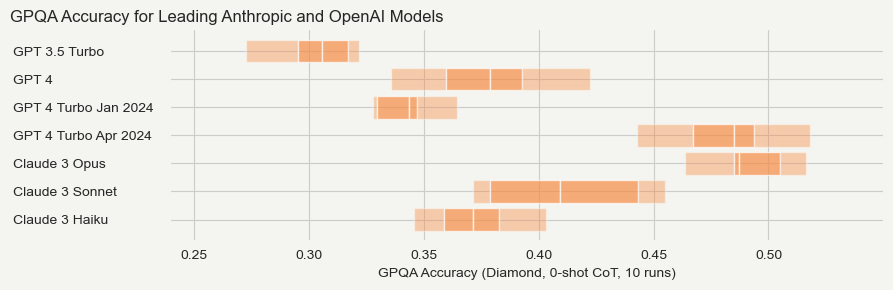

In [265]:
# Another version of the plot whcih did not pass review lol
sns.set_style("whitegrid")
# Calculate percentiles
percentiles = {}
for key in data:
    percentiles[key] = {
        "10th": np.percentile(data[key]["totals"], 10),
        "25th": np.percentile(data[key]["totals"], 25),
        "Median": np.percentile(data[key]["totals"], 50),
        "75th": np.percentile(data[key]["totals"], 75),
        "90th": np.percentile(data[key]["totals"], 90),
    }

# Plotting
fig, ax = plt.subplots(figsize=(9, 3))
bar_height = 0.8
opacity = [0.4, 0.7, 0.7, 0.4]
color = "#f68d45"
y = np.arange(len(data.keys()))
for i, key in zip(y, reversed(data.keys())):
    left = percentiles[key]["10th"]
    for j, percentile in enumerate(["25th", "Median", "75th", "90th"]):
        width = percentiles[key][percentile] - left
        ax.barh(
            i,
            width,
            bar_height,
            left=left,
            color=color,
            alpha=opacity[j],
        )
        left += width

fig.patch.set_facecolor("#f4f4f0")
ax.set_facecolor("#f4f4f0")

ax.set_yticks(range(len(data.keys())))
ax.set_yticklabels(reversed(model_names_nice))
ax.set_xticks([0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
sns.despine(bottom=True, left=True, right=True)
ax.set_xlabel("GPQA Accuracy (Diamond, 0-shot CoT, 10 runs)")
ax.set_xlim(0.24, 0.55)
ax.tick_params(axis="y", which="major", pad=110)
for tick in ax.yaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")

bbox = ax.get_yticklabels()[-1].get_window_extent()
x, _ = ax.transAxes.inverted().transform([bbox.x0, bbox.y0])
ax.set_title(
    "GPQA Accuracy for Leading Anthropic and OpenAI Models",
    ha="left",
    x=x,
)


# plt.text(0.435, 6, "10th", fontdict={"size": 6})
# plt.text(0.46, 4.8, "25th", fontdict={"size": 6})
# plt.text(0.4775, 4.8, "50th", fontdict={"size": 6})
# plt.text(0.49, 4.8, "75th", fontdict={"size": 6})
# plt.text(0.515, 4.8, "90th percentile", fontdict={"size": 6})


plt.tight_layout()
plt.savefig("all_samples.png", dpi=300, bbox_inches="tight")

plt.show()

## Stats tools

In [242]:
from scipy.stats import ttest_ind

opus = data["claude-3-opus-20240229"]
gpt4new = data["gpt-4-turbo-2024-04-09"]

In [249]:
print([int(x * 198) for x in opus["totals"]])
print([int(x * 198) for x in gpt4new["totals"]])

[96, 102, 100, 92, 100, 104, 97, 96, 96, 90]
[95, 107, 97, 85, 88, 102, 97, 94, 98, 92]


In [211]:
def z(x1, x2, n):
    p_hat = (x1 + x2) / (2 * n)
    q_hat = 1 - p_hat
    p_hat_1 = x1 / n
    p_hat_2 = x2 / n

    return (p_hat_1 - p_hat_2) / math.sqrt((p_hat * q_hat) * 2 / n)

In [260]:
def mcnemar(data1, data2):
    a = 0
    b = 0
    c = 0
    d = 0
    for i, j in zip(data1, data2):
        if i and j:
            d += 1
        elif not i and j:
            b += 1
        elif i and not j:
            c += 1
        elif not i and not j:
            a += 1

    return (abs(b - c) - 1) ** 2 / (b + c), [a, b, c, d]

In [261]:
mcnemar(opus["values"][5], gpt4new["values"][3])

(5.311475409836065, [73, 21, 40, 64])

In [237]:
ttest_ind(opus["totals"], gpt4new["totals"], equal_var=False)

TtestResult(statistic=0.6824307494848405, pvalue=0.5050138592619167, df=15.538295366181075)